In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img

2024-07-10 08:48:14.903818: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 08:48:14.903930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 08:48:15.035494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
folder_path  = '/kaggle/input/utkface-new/UTKFace'

In [3]:
age = [ ]
gender = [ ]
img_path = [ ]


for file in os.listdir(folder_path[0:15000]):
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))
    img_path.append(folder_path + '/' + file)

In [4]:
len(age)

23708

In [5]:
df = pd.DataFrame({'Age' : age, 'Gender' : gender,'img_path' : img_path})
df.shape

(23708, 3)

In [6]:
df

,Age,Gender,img_path
0,26,0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...
1,22,1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...
2,21,1,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...
3,28,0,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...
4,17,1,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...
...,...,...,...
23703,41,0,/kaggle/input/utkface-new/UTKFace/41_0_0_20170...
23704,42,0,/kaggle/input/utkface-new/UTKFace/42_0_0_20170...
23705,2,0,/kaggle/input/utkface-new/UTKFace/2_0_2_201612...
23706,65,1,/kaggle/input/utkface-new/UTKFace/65_1_0_20170...


In [7]:
df['Age'] = df['Age'].astype(int)
df['Gender'] = df['Gender'].astype(float)

In [9]:
# Map Gender and Race to categorical labels
gender_mapping = {0: 'Male', 1: 'Female'}
dataframe1 =  df.copy()
# Apply the mapping
dataframe1['Gender'] = dataframe1['Gender'].map(gender_mapping).astype('category')

dataframe1


,Age,Gender,img_path
0,26,Male,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...
1,22,Female,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...
2,21,Female,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...
3,28,Male,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...
4,17,Female,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...
...,...,...,...
23703,41,Male,/kaggle/input/utkface-new/UTKFace/41_0_0_20170...
23704,42,Male,/kaggle/input/utkface-new/UTKFace/42_0_0_20170...
23705,2,Male,/kaggle/input/utkface-new/UTKFace/2_0_2_201612...
23706,65,Female,/kaggle/input/utkface-new/UTKFace/65_1_0_20170...


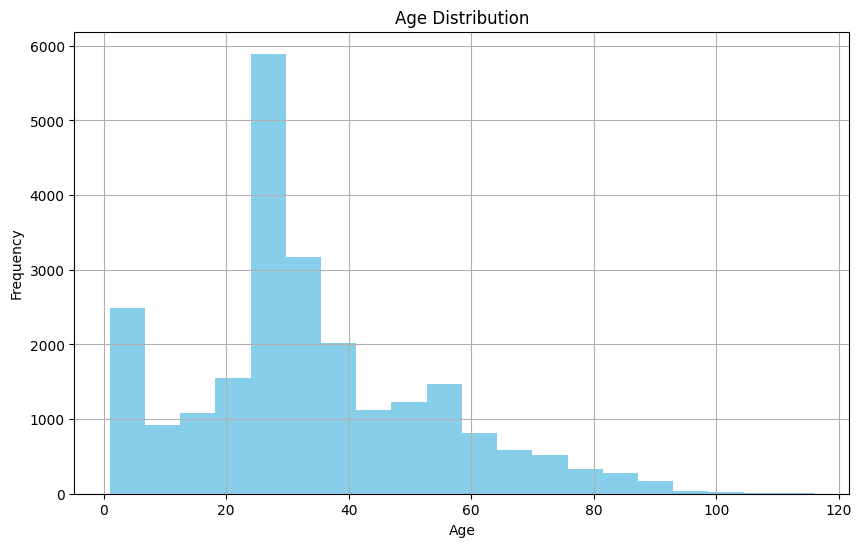

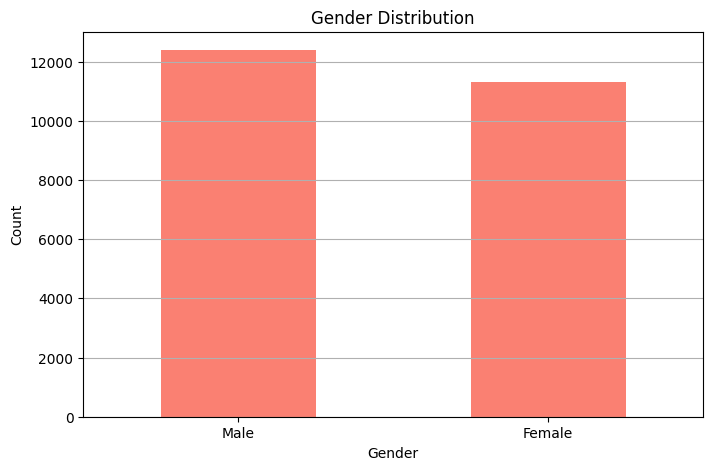

In [10]:
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(dataframe1['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 5))
dataframe1['Gender'].value_counts().plot(kind='bar', color='salmon')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [11]:
# Creating a function which will extract functions 
image_path = df['img_path']

def image_feature_extraction(path1):
    img = load_img(path1)
    img = img.resize((128,128))
    img_array = np.array(img)
    img_array = img_array/255.0
    return img_array

In [12]:
from tqdm import tqdm
from keras.preprocessing.image import load_img
features = []
for i in tqdm(image_path[0:10000]):
    res = image_feature_extraction(i)
    features.append(res)

print(len(features))

100%|██████████| 10000/10000 [00:47<00:00, 209.95it/s]

10000


In [13]:
features_array = np.array(features)
features_array.shape

(10000, 128, 128, 3)

In [14]:
y_age = df['Age'][0:10000]
y_gender = df['Gender'][0:10000]

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(features_array, y_age, test_size=0.2, random_state = 42 )
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(features_array, y_gender, test_size=0.2, random_state = 42)

In [15]:
print("Train Shape for Age:",x_train_age.shape,"&","Test Shape For Age:", x_test_age.shape)
print("Train Shape for Gender:",x_train_gender.shape,"&","Test Shape For Gender:", x_test_gender.shape)

Train Shape for Age: (8000, 128, 128, 3) & Test Shape For Age: (2000, 128, 128, 3)
Train Shape for Gender: (8000, 128, 128, 3) & Test Shape For Gender: (2000, 128, 128, 3)


In [16]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import tensorflow.keras.layers as L

In [17]:
input_size=(128,128,3)

In [18]:
model_age = Sequential([
    L.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=input_size),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=1, padding='same'),
    Dropout(0.2), # Adding the Dropout layer.

    L.Conv2D(64, kernel_size=2, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=1, padding='same'),
    Dropout(0.2),  # Adding the Dropout layer.

    L.Flatten(),
    L.Dense(256,activation='relu'),
    L.BatchNormalization(),
    L.Dense(1)
    ])
model_age.compile(optimizer='adam',loss='mean_squared_error',metrics=['root_mean_squared_error'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
history_age = model_age.fit(x_train_age, y_train_age,validation_data=(x_test_age,y_test_age), epochs = 20, batch_size = 32)

Epoch 1/20


I0000 00:00:1720601528.383181     138 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720601528.406027     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 1307.8888 - root_mean_squared_error: 36.0968

W0000 00:00:1720601568.818145     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 179ms/step - loss: 1306.7803 - root_mean_squared_error: 36.0809 - val_loss: 343.7507 - val_root_mean_squared_error: 18.5405
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 168ms/step - loss: 250.5464 - root_mean_squared_error: 15.7766 - val_loss: 340.2057 - val_root_mean_squared_error: 18.4447
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 158.9651 - root_mean_squared_error: 12.6025 - val_loss: 185.1908 - val_root_mean_squared_error: 13.6085
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 115.5688 - root_mean_squared_error: 10.7449 - val_loss: 249.5070 - val_root_mean_squared_error: 15.7958
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 94.5602 - root_mean_squared_error: 9.7187 - val_loss: 151.2157 - val_root_mean_squared_error: 12.2970
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 76.2842 - root_mean_squared_error: 8.7332 - val_loss: 611.0266 - val_root_mean_squared_error: 24.7190
Epoch 7/20
2

In [20]:
# Save model architecture to JSON
model_json = model_age.to_json()
with open("model_age.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5
model_age.save_weights("model_age.weights.h5")
print("Model architecture saved to model_age.json and weights to model_age_weights.h5")


Model architecture saved to model_age.json and weights to model_age_weights.h5


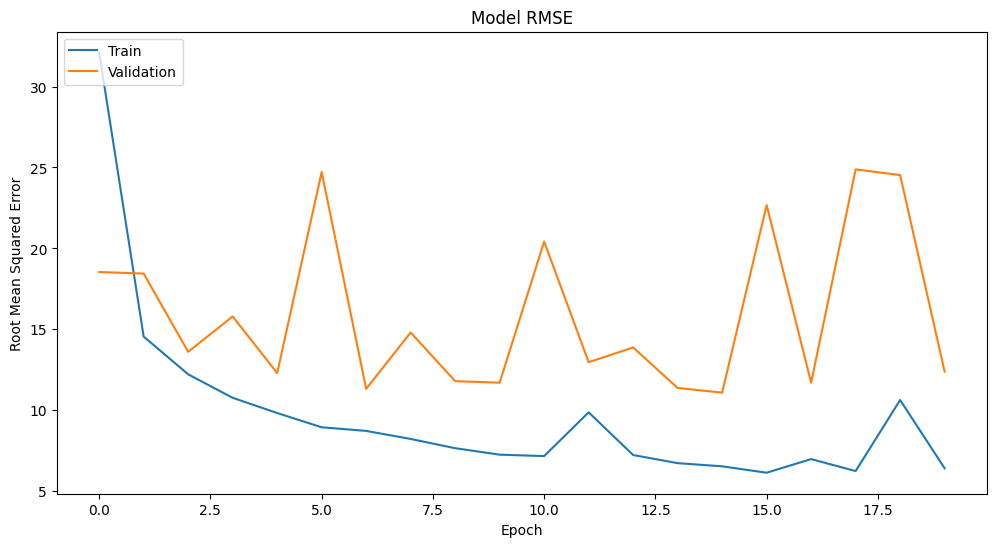

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history_age.history['root_mean_squared_error'])
plt.plot(history_age.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
model_gender = Sequential([
    L.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=input_size),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=1, padding='same'),
    Dropout(0.2), # Adding the Dropout layer.

    L.Conv2D(64, kernel_size=2, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool2D(pool_size=2, strides=1, padding='same'),
    Dropout(0.2),  # Adding the Dropout layer.

    L.Flatten(),
    L.Dense(256,activation='relu'),
    L.BatchNormalization(),
    L.Dense(1,activation= 'sigmoid')
    ])
model_gender.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [28]:
history_gender = model_gender.fit(x_train_gender, y_train_gender,validation_data=(x_test_gender,y_test_gender), epochs = 20, batch_size = 32)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.9887 - loss: 0.0304 - val_accuracy: 0.8650 - val_loss: 0.4386
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9854 - loss: 0.0414 - val_accuracy: 0.8750 - val_loss: 0.4418
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9904 - loss: 0.0282 - val_accuracy: 0.8430 - val_loss: 0.5551
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9931 - loss: 0.0237 - val_accuracy: 0.8695 - val_loss: 0.5383
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9936 - loss: 0.0178 - val_accuracy: 0.8660 - val_loss: 0.4875
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9955 - loss: 0.0162 - val_accuracy: 0.8625 - val_loss: 0.5671
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.8540 - val_loss: 0.6010
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9912 - loss: 0

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_gender = model_gender.predict(x_test_gender)
y_pred_binary = np.where(y_pred_gender >= 0.5, 1, 0)
print('Accuracy Score:- ', accuracy_score(y_test_gender, y_pred_binary))
print('Confusion Matrix:- ', confusion_matrix(y_test_gender, y_pred_binary))
print('Classification Report:- \n', classification_report(y_test_gender, y_pred_binary))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
Accuracy Score:-  0.8745
Confusion Matrix:-  [[836 158]
 [ 93 913]]
Classification Report:- 
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       994
         1.0       0.85      0.91      0.88      1006

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



In [30]:
# Save model architecture to JSON
model_json = model_gender.to_json()
with open("model_gender.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5
model_gender.save_weights("model_gender.weights.h5")
print("Model architecture saved to model_age.json and weights to model_age_weights.h5")

Model architecture saved to model_age.json and weights to model_age_weights.h5


In [35]:
gender_dict = {0: 'Male', 1: 'Female'}
def predictions(path):
    a=load_img(path)
    a=a.resize((200,200))
    array_pred=image_feature_extraction(path)
    res=array_pred.reshape(1,128,128,3)
    age_pred=model_age.predict(res)
    gender_pred=model_gender.predict(res)
    gender_pred=np.where(gender_pred >= 0.5, 1, 0)
    gender_prediction = gender_dict[int(np.round(gender_pred[0][0]))]
    print("The gender is:",gender_prediction)
    print("The Age is",np.round(age_pred[0][0],0))
    return a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The gender is: Female
The Age is 36.0


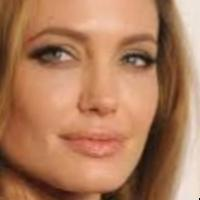

In [36]:
prediction_path='/kaggle/input/utkface-new/UTKFace/40_1_0_20170117150823490.jpg.chip.jpg'
predictions(prediction_path)